## □ kNN 머신러닝 알고리즘을 이용하여 유방암 데이터 분류 데이터 분석
    1단계 : 데이터 수집
    2단계 : 데이터 탐색과 준비
    3단계 : 데이터 모델로 훈련
    4단계 : 모델 성능 평가
    5단계 : 모델 성능개선

### ■ 1단계 : 데이터 수집
    569개의 진단 데이터셋이며 암 조직 검사 예시
    32개의 특징을 갖고 있으며 디지털 이미지에 존재하는 세포핵의 특성을 나타냄
        반지름, 질감, 둘레, 넓이, 매끄러움, 조밀성, 오목함, 오목점, 대칭성, 프랙탈 차원
        정답(라벨) : diagnosis(진단) 양성(B) / 악성(M)

### ■ 2단계: 데이터 시각화

In [1]:
#1. 데이터를 로드 한다.
wbcd <- read.csv("wisc_bc_data.csv", header=T,  stringsAsFactors=FALSE)
table(wbcd$diagnosis)


  B   M 
357 212 

    1. 정답에 해당하는 라벨 column의 데이터 분포를 막대그래프로 시각화
        악성 데이터와 양성 데이터가 50:50으로 분포되어있는 것이 가장 이상적이나 보통은 그렇지 않기 때문에 데이터를 맞춰줄 필요가 있다
        (모델의 정확도가 낮을 때 고려해볼 필요가 있음)
        
    2. 수치형 변수 데이터의 분포를 파악
        - 정규분포 그래프
        
    3. 이상치가 있는지 확인해 볼 필요
        - 사분위수 그래프
    
    4. 결측치가 많은 column이 무엇인지 확인
        - 결측치를 다른 값으로 치환하거나 삭제 → 파생변수 생성
        
    

In [2]:
#2. diagnosis 를 factor 로 변환한다
wbcd$diagnosis <- factor(wbcd$diagnosis,
                          levels =c("B","M"),
                   labels = c("Benign","Maliganant"))

In [3]:
colSums(is.na(wbcd))

id         diagnosis       radius_mean      texture_mean 
                0                 0                 0                 0 
   perimeter_mean         area_mean   smoothness_mean  compactness_mean 
                0                 0                 0                 0 
   concavity_mean       points_mean     symmetry_mean    dimension_mean 
                0                 0                 0                 0 
        radius_se        texture_se      perimeter_se           area_se 
                0                 0                 0                 0 
    smoothness_se    compactness_se      concavity_se         points_se 
                0                 0                 0                 0 
      symmetry_se      dimension_se      radius_worst     texture_worst 
                0                 0                 0                 0 
  perimeter_worst        area_worst  smoothness_worst compactness_worst 
                0                 0                 0                 0 
  concavity_worst      points_worst    symmetry_worst   dimension_worst 
                0                 0                 0                 0

In [4]:
colnames(wbcd)

[1] "id"                "diagnosis"         "radius_mean"      
 [4] "texture_mean"      "perimeter_mean"    "area_mean"        
 [7] "smoothness_mean"   "compactness_mean"  "concavity_mean"   
[10] "points_mean"       "symmetry_mean"     "dimension_mean"   
[13] "radius_se"         "texture_se"        "perimeter_se"     
[16] "area_se"           "smoothness_se"     "compactness_se"   
[19] "concavity_se"      "points_se"         "symmetry_se"      
[22] "dimension_se"      "radius_worst"      "texture_worst"    
[25] "perimeter_worst"   "area_worst"        "smoothness_worst" 
[28] "compactness_worst" "concavity_worst"   "points_worst"     
[31] "symmetry_worst"    "dimension_worst"

In [5]:
library(outliers)
grubbs.flag <- function(x) {
  outliers <- NULL
  test <- x
  grubbs.result <- grubbs.test(test)
  pv <- grubbs.result$p.value
  while(pv < 0.05) {
    outliers <- c(outliers,as.numeric(strsplit(grubbs.result$alternative," ")[[1]][3]))
    test <- x[!x %in% outliers]
    grubbs.result <- grubbs.test(test)
    pv <- grubbs.result$p.value
  }
  return(data.frame(X=x,Outlier=(x %in% outliers)))
}

### ※ 문제222. wbcd의 radius_mean에 이상치가 몇 개 인지 확인하시오(True가 몇 개인지)

In [6]:
rs <- grubbs.flag(wbcd$radius_mean)
rs[rs$Outlier=='TRUE',]

,X,Outlier
166,27.22,TRUE
276,28.11,TRUE
461,27.42,TRUE


### ※ 문제223. wbcd의 모든 column에 이상치가 각각 몇 개 있는지 아래와 같이 출력되게 하시오

In [7]:
for (i in 4:length(colnames(wbcd))){
  a = grubbs.flag(wbcd[,colnames(wbcd)[i]])
  b = a[a$Outlier==TRUE,"Outlier"]
  print(paste(colnames(wbcd)[i],'-->',length(b)))
}

[1] "texture_mean --> 1"
[1] "perimeter_mean --> 3"
[1] "area_mean --> 6"
[1] "smoothness_mean --> 1"
[1] "compactness_mean --> 2"
[1] "concavity_mean --> 4"
[1] "points_mean --> 1"
[1] "symmetry_mean --> 2"
[1] "dimension_mean --> 6"
[1] "radius_se --> 7"
[1] "texture_se --> 5"
[1] "perimeter_se --> 14"
[1] "area_se --> 14"
[1] "smoothness_se --> 7"
[1] "compactness_se --> 12"
[1] "concavity_se --> 10"
[1] "points_se --> 6"
[1] "symmetry_se --> 13"
[1] "dimension_se --> 17"
[1] "radius_worst --> 1"
[1] "texture_worst --> 1"
[1] "perimeter_worst --> 1"
[1] "area_worst --> 8"
[1] "smoothness_worst --> 2"
[1] "compactness_worst --> 6"
[1] "concavity_worst --> 3"
[1] "points_worst --> 0"
[1] "symmetry_worst --> 5"
[1] "dimension_worst --> 3"


In [8]:
# 양성과 악성의 비율을 확인
round(prop.table(table(wbcd$diagnosis))*100,digit=1)


    Benign Maliganant 
      62.7       37.3 

In [9]:
#3. 데이터를 shuffle 시킨다.
# wbcd[sample(10),] # 1번~10번까지의 데이터가 섞여서 출력이됨
wbcd_shuffle <- wbcd[sample(nrow(wbcd)), ]
wbcd_shuffle

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
298,849014,Maliganant,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,...,27.320,30.88,186.80,2398.0,0.15120,0.31500,0.537200,0.238800,0.2768,0.07615
108,91544001,Benign,12.22,20.04,79.47,453.1,0.10960,0.11520,0.081750,0.021660,...,13.160,24.17,85.13,515.3,0.14020,0.23150,0.353500,0.080880,0.2709,0.08839
100,8611555,Maliganant,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.647600,0.286700,0.2355,0.10510
432,916799,Maliganant,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,...,21.860,26.20,142.20,1493.0,0.14920,0.25360,0.375900,0.151000,0.3074,0.07863
300,911916,Maliganant,16.25,19.51,109.80,815.8,0.10260,0.18930,0.223600,0.091940,...,17.390,23.05,122.10,939.7,0.13770,0.44620,0.589700,0.177500,0.3318,0.09136
327,88249602,Benign,14.03,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,...,15.330,30.28,98.27,715.5,0.12870,0.15130,0.062310,0.079630,0.2226,0.07617
359,844359,Maliganant,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
547,864726,Benign,8.95,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,...,9.414,17.07,63.34,270.0,0.11790,0.18790,0.154400,0.038460,0.1652,0.07722
172,908489,Maliganant,13.98,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.406900,0.182700,0.3179,0.10550
295,9012000,Maliganant,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,...,27.660,25.80,195.00,2227.0,0.12940,0.38850,0.475600,0.243200,0.2741,0.08574


In [10]:
#4. 데이터에서 id 를 제외 시킨다
wbcd2 <- wbcd_shuffle[-1]
head(wbcd2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
298,Maliganant,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
108,Benign,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
100,Maliganant,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510
432,Maliganant,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,21.86,26.20,142.20,1493.0,0.1492,0.2536,0.37590,0.15100,0.3074,0.07863
300,Maliganant,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,...,17.39,23.05,122.10,939.7,0.1377,0.4462,0.58970,0.17750,0.3318,0.09136
327,Benign,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.01896,0.1517,...,15.33,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617


In [11]:
#5. 데이터를 정규화 한다.
normalize <- function(x) {
      return ( (x-min(x)) / (max(x) - min(x))  )
}
# 서로 단위가 다른 데이터를 전부 0-1사이의 데이터로 맞춰준다

wbcd_n  <- as.data.frame(lapply(wbcd2[2:31],normalize))
summary(wbcd_n)

  radius_mean      texture_mean    perimeter_mean     area_mean     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2233   1st Qu.:0.2185   1st Qu.:0.2168   1st Qu.:0.1174  
 Median :0.3024   Median :0.3088   Median :0.2933   Median :0.1729  
 Mean   :0.3382   Mean   :0.3240   Mean   :0.3329   Mean   :0.2169  
 3rd Qu.:0.4164   3rd Qu.:0.4089   3rd Qu.:0.4168   3rd Qu.:0.2711  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 smoothness_mean  compactness_mean concavity_mean     points_mean    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.3046   1st Qu.:0.1397   1st Qu.:0.06926   1st Qu.:0.1009  
 Median :0.3904   Median :0.2247   Median :0.14419   Median :0.1665  
 Mean   :0.3948   Mean   :0.2606   Mean   :0.20806   Mean   :0.2431  
 3rd Qu.:0.4755   3rd Qu.:0.3405   3rd Qu.:0.30623   3rd Qu.:0.3678  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  
 symmetry_mean    dimension

In [12]:
#6. train 데이터와 test 데이터로 9 대 1로 나눈다
train_num<-round(0.9*nrow(wbcd_n),0)
wbcd_train<-wbcd_n[1:train_num,]
wbcd_test<-wbcd_n[(train_num+1):nrow(wbcd_n),]

In [13]:
#7. train 데이터를 데이터와 라벨로 나누고 test  데이터를 데이터와 라벨로 나누시오 ~
wbcd_train_labels <- wbcd2[1:train_num,1]
wbcd_test_labels <- wbcd2[(train_num+1):nrow(wbcd_n),1]

In [14]:
install.packages('class')
library(class)

Installing package into 'C:/Users/knitwill/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'class' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\knitwill\AppData\Local\Temp\RtmpmCJFFH\downloaded_packages


Warning message:
"package 'class' was built under R version 3.6.3"

### ■ 3단계: 데이터로 모델 훈련

In [15]:
#8. knn 모델로 훈련시켜서 모델을 만들고 바로 그 모델에 test 데이터를 넣어서 정확도를 확인한다
rs <- knn(train=wbcd_train, test=wbcd_test, cl=wbcd_train_labels, k=21)

### ■ 4단계: 모델 성능평가

In [16]:
x <- data.frame(실제=wbcd_test_labels, 예측=rs)
table(x)

            예측
실제         Benign Maliganant
  Benign         33          0
  Maliganant      3         21

### ※ 문제224. 주어진 k값으로 모델을 훈련시키고 모델 성능평가 결과를 댓글로 올리시오

In [17]:
rs2 <- knn(train=wbcd_train, test=wbcd_test, cl=wbcd_train_labels, k=51)
x <- data.frame(실제=wbcd_test_labels, 예측=rs2)
table(x)

            예측
실제         Benign Maliganant
  Benign         33          0
  Maliganant      4         20

### ※ 문제225. CrossTable 함수를 이용해서 모델의 성능을 확인하시오

In [18]:
library(gmodels)

Warning message:
"package 'gmodels' was built under R version 3.6.3"

In [19]:
g2 <- CrossTable(x=wbcd_test_labels, y=rs2,chisq=F)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  57 

 
                 | rs2 
wbcd_test_labels |     Benign | Maliganant |  Row Total | 
-----------------|------------|------------|------------|
          Benign |         33 |          0 |         33 | 
                 |      6.259 |     11.579 |            | 
                 |      1.000 |      0.000 |      0.579 | 
                 |      0.892 |      0.000 |            | 
                 |      0.579 |      0.000 |            | 
-----------------|------------|------------|------------|
      Maliganant |          4 |         20 |         24 | 
                 |      8.606 |     15.921 |            | 
                 |      0.167 |      0.833 |      0.421 | 
                 |      0.108 |      1.000 |            | 
              

### ※ 문제226. 적절한 k 값을 알아내기 위한 시각화 코드를 참고해서 우리가 테스트한 변수로 변경해서 그래프를 시각화 하시오
### 　　　　　 시각화 한 그래프를 첨부


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  57 

 
                 | wbcd_test_pred 
wbcd_test_labels |     Benign | Maliganant |  Row Total | 
-----------------|------------|------------|------------|
          Benign |         32 |          1 |         33 | 
                 |      6.798 |     10.815 |            | 
                 |      0.970 |      0.030 |      0.579 | 
                 |      0.914 |      0.045 |            | 
                 |      0.561 |      0.018 |            | 
-----------------|------------|------------|------------|
      Maliganant |          3 |         21 |         24 | 
                 |      9.348 |     14.871 |            | 
                 |      0.125 |      0.875 |      0.421 | 
                 |      0.086 |      0.955 |            | 
   

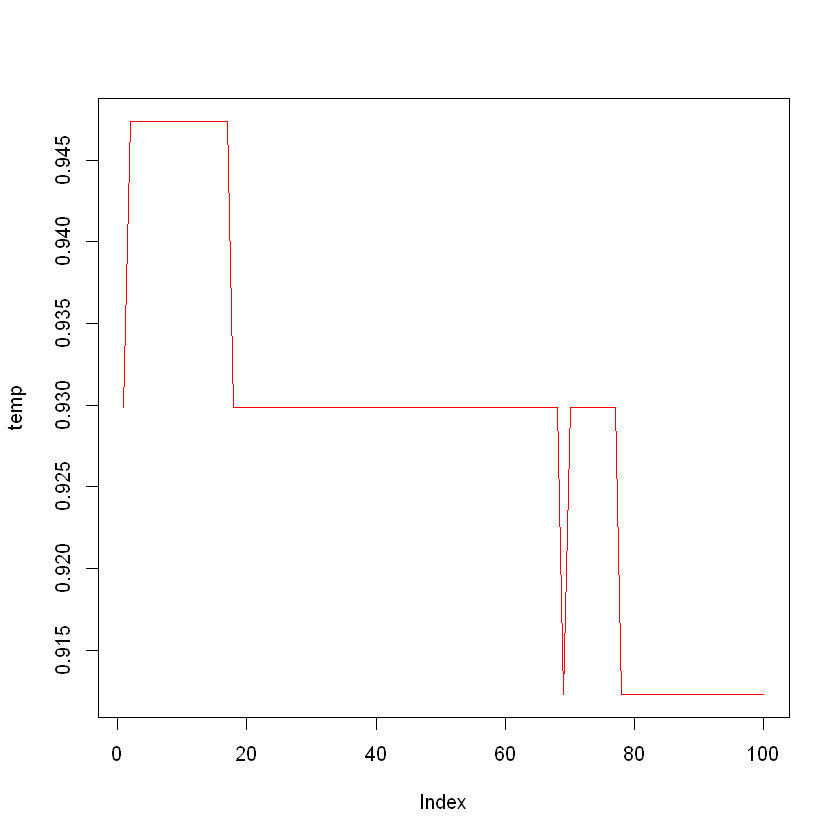

In [20]:
temp<-c()
for ( i in 1:200 ) {
  if  ( i%%2 != 0  ) { 
    wbcd_test_pred <- knn(train=wbcd_train, test=wbcd_test,
                          cl = wbcd_train_labels,  k=i )
    g2 <- CrossTable(x=wbcd_test_labels, y=wbcd_test_pred, chisq=FALSE)
    g3 <- g2$prop.tbl[1] + g2$prop.tbl[4]
    temp<-append(temp, g3 )
  }
}
plot(temp, type='l', col='red')

In [31]:
rs2 <- knn(train=wbcd_train, test=wbcd_test, cl=wbcd_train_labels, k=15)
x <- data.frame(실제=wbcd_test_labels, 예측=rs2)
table(x)

            예측
실제         Benign Maliganant
  Benign         33          0
  Maliganant      3         21